In [1]:
import deorbit
import numpy as np
import matplotlib.pyplot as plt
from deorbit.observer import Observer
from deorbit.utils.dataio import load_sim_data, load_sim_config
from deorbit.utils.plotting import plot_trajectories, plot_height, plot_crash_site


The notebook exists to show the functionality of the 3D observer module. The observer class has been initialised below with 20 radars, in a 3D space. The location has not been set and so the radars will be distributed evenly across the surface of the Earth. The variance per meter has been set to 0.5. 

In [ ]:
obs = Observer(number_of_radars=20, dim=3) #0.5 what??? units

To visualise the distribution of the radars the __plot_config()__ function can be used.

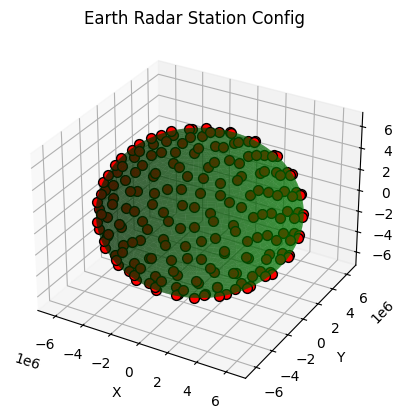

In [ ]:
obs.plot_config()



To take measurement we need to run a 3D simulation.

In [ ]:
save_path = "eg/sim_example_3D/" #take care to delete this data file when making changes to initial set up

sim_data = load_sim_data(save_path)
sim_config = load_sim_config(save_path)

#this takes roughly 10 seconds
if sim_data is None or sim_config is None:
    np.random.seed(0)
    sim = deorbit.simulator.run(
        "RK4",
        "coesa_atmos_fast",
        initial_state=np.array((deorbit.constants.EARTH_RADIUS + 150000, 0, 0, 0, 0, 7820)),
        time_step=2,
    )
    sim_data = sim.gather_data()
    sim_config = sim.export_config()
    sim.save_data(save_path)
else:
    print("Loaded data from file")

Loaded data from file


In [ ]:
sim_states = sim_data.state_array()
sim_times = sim_data.times
_, _, _ = obs.run(sim_states=sim_states, sim_times=sim_times, checking_interval=100)

Viewing measurements on plot.

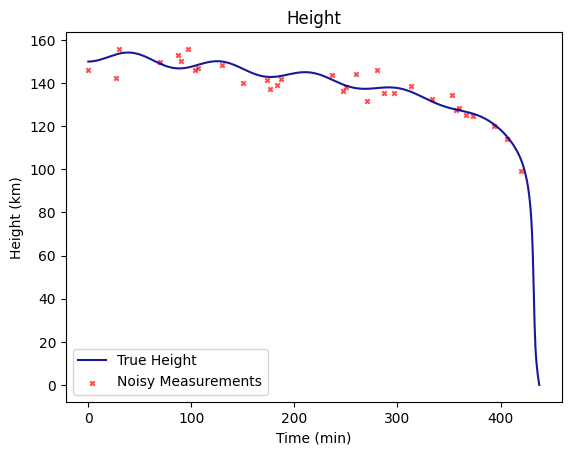

In [ ]:
obs_states = obs.observed_states
obs_times = obs.observed_times
traj = sim_states[:, :3]


plot_height(traj, sim_times, observations=obs_states, observation_times = obs_times)

The greater variance here can be seen as the measurements are visbily further from the true values.